## <font color='lightblue'>Lab Enhancement : Logistic Regression </font>

## What was lacking in the Original Lab?

#### 1.Overview and Summarization
#### 2. Comparison Between logistic regression and similar classification algorithms such as Decision Trees, SVM


## What is added and improved in Enhanced Lab?

#### 1. Added Conceptual Explanation for each of methods
#### 2.Comparison Between Logistic Regression with other models.
#### 3.Simplified Codes and Structured walkthrough to ease students with minimal knowledge
#### 4.Added overview at the top of the lab




## <font color='lightblue'>Overview of the Lab </font>

#### This lab explores Logistic Regression, a method for binary classification tasks, predicting outcomes like disease diagnosis or spam detection. The logistic sigmoid function transforms inputs into probabilities, aiding in tasks such as predicting tumor malignancy.
#### The log-odds (logit) function models the log-odds of outcomes for easier interpretation, often used in credit scoring. The decision boundary determines classification thresholds, helping distinguish categories like fraudulent vs. legitimate transactions.
#### Single-predictor logistic regression examines relationships between one variable and a binary outcome, useful in predicting simple scenarios like exam pass rates. Performance metrics like confusion matrix, precision, recall, and F1 score evaluate model accuracy in areas like medical diagnostics.
#### To enhance performance, the lab explores feature selection and hyperparameter tuning, improving applications like customer segmentation. Multiple-predictor logistic regression models complex relationships, aiding in tasks like predicting customer churn using multiple variables.
#### This enhanced lab bridges theory and application, emphasizing practical insights and real-world datasets.

## <font color='lightblue'>Import Libraries </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_iris

## <font color='lightblue'>Logistics Sigmoid Function </font>

The sigmoid function maps input values to probabilities between 0 and 1. It’s defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
​


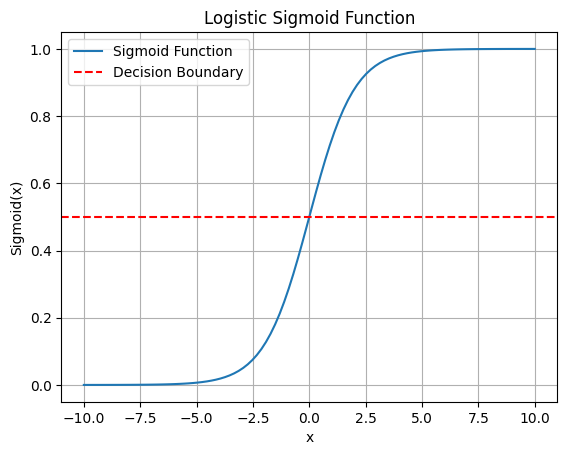

In [2]:
# Plotting the Sigmoid Function
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid, label="Sigmoid Function")
plt.title("Logistic Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.axhline(0.5, color='r', linestyle='--', label="Decision Boundary")
plt.legend()
plt.grid()
plt.show()


## <font color='lightblue'>Single-Predictor Logistic Regression </font>
#### Using Diabetes dataset from sklearn package

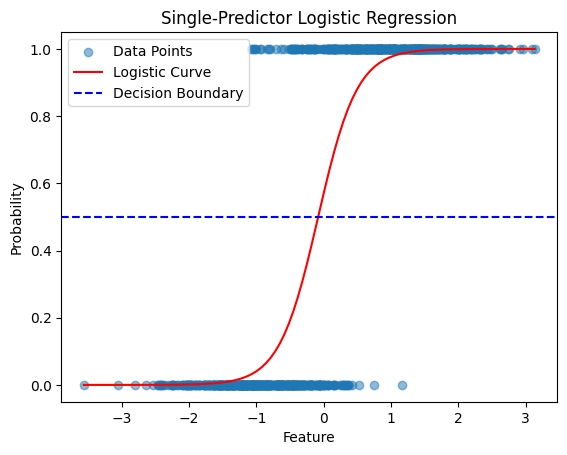

Confusion Matrix:
 [[144  11]
 [ 12 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       155
           1       0.92      0.92      0.92       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [7]:
# Load the dataset
from sklearn.datasets import make_classification

# Generate the dataset
X, y = make_classification(
    n_samples=1000,
    n_features=1,  # Use a single feature for decision boundary visualization
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Visualize decision boundary
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]

plt.scatter(X, y, alpha=0.5, label="Data Points")
plt.plot(x_range, y_prob, color='red', label="Logistic Curve")
plt.axhline(0.5, color='blue', linestyle='--', label="Decision Boundary")
plt.title("Single-Predictor Logistic Regression")
plt.xlabel("Feature")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## <font color='lightblue'>Multiple-Predictor Logistic Regression </font>


In [9]:
# Generate dataset with multiple predictors
X, y = make_classification()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
multi_model = LogisticRegression()
multi_model.fit(X_train, y_train)

# Evaluate
y_pred = multi_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## <font color='lightblue'>Regularization (L1 and L2) </font>

##### L1 Regularization (Lasso) : Shrinks some coefficients to zero,useful for feature selection
##### L2 Regularization (Ridge) : Penalizes large coefficients to prevent overfitting

In [10]:
# L1 Regularization
l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
l1_model.fit(X_train, y_train)
print("L1 Regularization Coefficients:", l1_model.coef_)

# L2 Regularization
l2_model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
l2_model.fit(X_train, y_train)
print("L2 Regularization Coefficients:", l2_model.coef_)


L1 Regularization Coefficients: [[-0.53098298  0.11631615  0.         -0.21431677  0.28259242  0.86553446
   0.76607481  0.          0.         -0.01215143 -0.02902268 -0.50125701
  -0.10833739 -0.20215469  0.          0.          2.9181336   0.
   0.          0.        ]]
L2 Regularization Coefficients: [[-0.5766929   0.20691368 -0.0708877  -0.38032616  0.34749173  0.77732588
   0.76459862 -0.05531123  0.38305661 -0.12930302 -0.20903976 -0.58820063
  -0.12387788 -0.24267047 -0.09857863  0.05865165  2.00071941 -0.6735411
   0.90136583  0.01442944]]


## <font color='lightblue'>Multi-class Logistic Regression </font>


In [11]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit multi-class logistic regression
multi_class_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multi_class_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = multi_class_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/Users/haziqzairul/.local/share/virtualenvs/datamining-5l9yRiuj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## <font color='lightblue'>Comparison with Decision Tree </font>


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Fit decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluate
y_pred_tree = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 1.0
Logistic Regression Accuracy: 1.0


## <font color='lightblue'>Cross Validation </font>


In [13]:
# Perform cross-validation on logistic regression
cv_scores = cross_val_score(multi_class_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9733333333333334


/Users/haziqzairul/.local/share/virtualenvs/datamining-5l9yRiuj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/haziqzairul/.local/share/virtualenvs/datamining-5l9yRiuj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/haziqzairul/.local/share/virtualenvs/datamining-5l9yRiuj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://s